# Espectroscopia Óptica

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [4]:
sns.set_theme()

In [206]:
def gaussian(x, A, m, s): return A * np.exp( -(x - m)**2 / (2 * s**2) )

## Calibração com espectro de Mercúrio

In [207]:
data = np.loadtxt('data/mercurio_1.txt').transpose()

In [208]:
peaks = find_peaks(data[1], prominence=8000, distance=20)[0]
len(peaks)

14

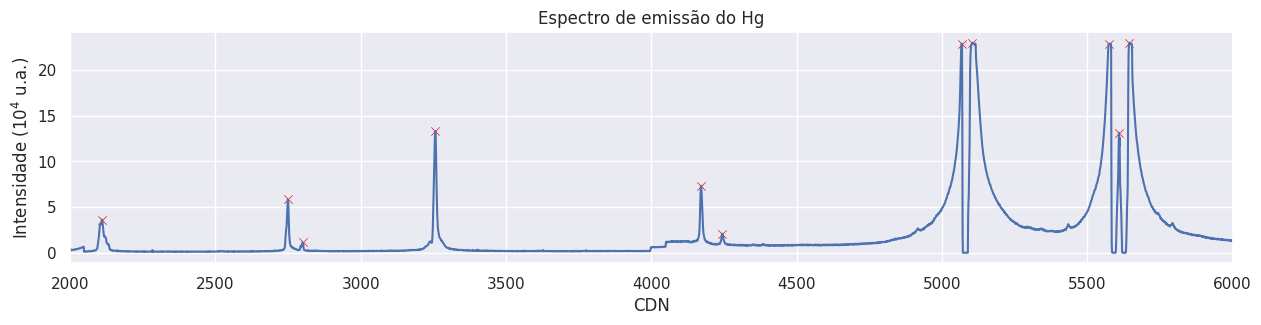

In [209]:
plt.figure(figsize=(15, 3))
plt.title('Espectro de emissão do Hg')

sns.lineplot(x=data[0], y=data[1]/1E4)
sns.scatterplot(x=data[0][peaks], y=data[1][peaks]/1E4, color='red', marker='x')

plt.xlim(2000, 6000)
plt.xlabel('CDN')
plt.ylabel('Intensidade ($10^4$ u.a.)')

plt.savefig('plots/hg_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

In [224]:
peaks_data = { 'p': data[0][peaks], 'h': data[1][peaks], 'fit': [] }

for i in range(len(peaks)):
	fit = curve_fit(
		gaussian,
		xdata=data[0][peaks[i]-1000:peaks[i]+1000],
		ydata=data[1][peaks[i]-1000:peaks[i]+1000],
		p0=[ peaks_data['h'][i], peaks_data['p'][i], 2 ],
		maxfev=30000
	)[0]

	peaks_data['fit'].append(fit)

In [230]:
for i in range(len(peaks)): print('{}\t{}'.format(peaks_data['fit'][i][1], peaks_data['fit'][i][2]))

1142.2452039019709	0.4178292530846121
2109.793230903709	10.65242233457171
2748.7866683570883	4.426062188698012
2748.78636870305	4.427500266069161
3256.3466381298394	4.993220907030185
4171.615851790906	6.007937043536889
5103.621062863321	73.57300070120705
5105.42821487246	82.56646045054417
5105.428150296922	82.54000383419731
5612.951959494481	130.19772964884638
5609.353379626817	4.7872971649774465
5612.952635027928	130.19457988059213
8219.18436144876	32.38322240300929
8219.186819530942	32.396098862285605


In [237]:
peaks = np.loadtxt('data/picos_mercurio_1.txt').transpose()

In [240]:
popt, pcov = curve_fit(
	lambda x, a, b: a * x + b,
	xdata=peaks[0],	# Pixel
	ydata=peaks[1]	# Comprimento de onda
)

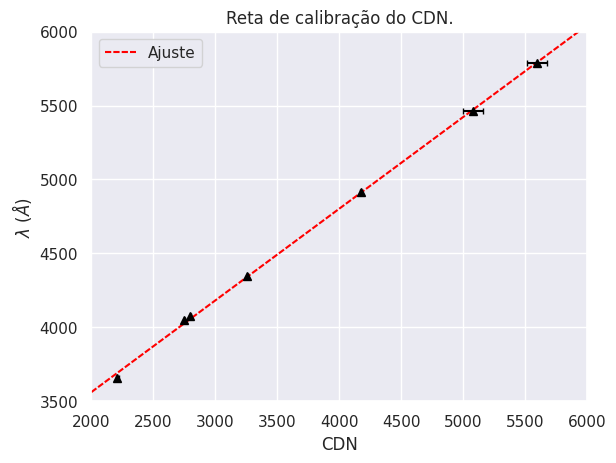

In [242]:
plt.title('Reta de calibração do CDN.')

x = np.linspace(2000, 6000, 10)

sns.lineplot(x=x, y=popt[0]*x+popt[1], color='red', dashes=(3,1), label='Ajuste')
plt.errorbar(
	x=peaks[0],
	y=peaks[1],
	xerr=peaks[2],
	label='Picos', color='black', marker='^', fmt=' ', capsize=2
)

plt.xlim(2000, 6000)
plt.ylim(3500, 6000)
plt.xlabel('CDN')
plt.ylabel('$\\lambda$ ($\\AA$)')
plt.show()

In [243]:
popt, np.sqrt(pcov)

/tmp/ipykernel_3405/2161760635.py:1: RuntimeWarning: invalid value encountered in sqrt
  popt, np.sqrt(pcov)


(array([6.20591535e-01, 2.32062353e+03]),
 array([[7.04968745e-03,            nan],
        [           nan, 2.73493224e+01]]))

## Análise do espectro do Hidrogênio

In [244]:
data = np.loadtxt('data/hidrogenio.txt').transpose()
h_lines = np.loadtxt('data/h_lines_nist.txt').transpose()

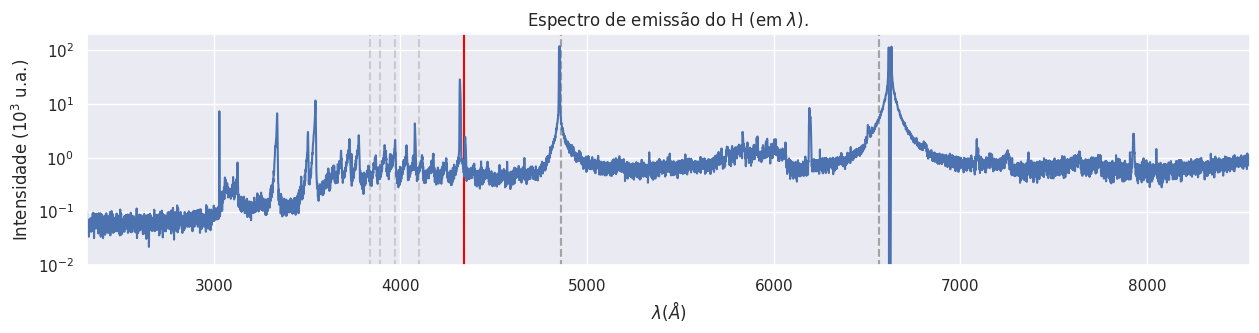

In [265]:
plt.figure(figsize=(15, 3))
plt.title('Espectro de emissão do H (em $\\lambda$).')

plt.vlines(x=h_lines, ymin=0, ymax=200, color='gray', linestyles='dashed', alpha=0.3)

plt.vlines(x=4340, ymin=0, ymax=200, color='red')

x = popt[0] * data[0] + popt[1]
sns.lineplot(x=x, y=data[1]/1E3)

plt.ylim(1E-2, 2E2)
plt.xlim( np.min(x), np.max(x) )
plt.yscale('log')
plt.xlabel('$\\lambda (\\AA)$')
plt.ylabel('Intensidade ($10^3$ u.a.)')

plt.savefig('plots/h_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
wl_peaks = [ 6630, 4868, 4340 ]

In [109]:
hydro_wl = popt[0] * np.array([  ]) + popt[1]

In [110]:
wls = hydro_wl[-6:-1]
wls = np.delete(wls, obj=4)

xdata = 1 / np.array([ 7, 5, 4, 3 ])**2
ydata = 1 / wls

In [111]:
fit = curve_fit(
	lambda x, a, b: a * x + b,
	xdata=xdata,
	ydata=ydata
)

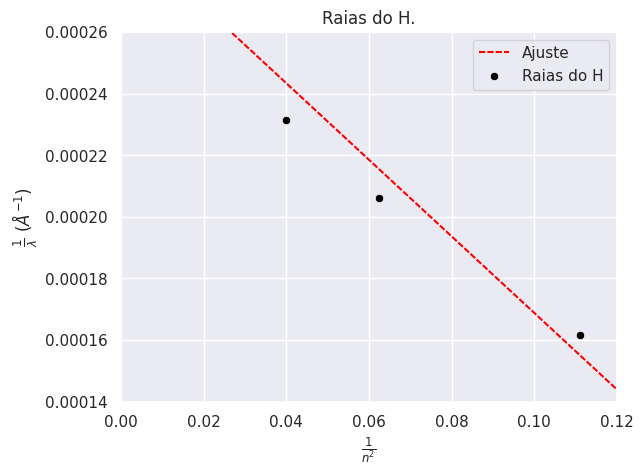

In [112]:
plt.title('Raias do H.')

x = np.linspace(0, 0.12, 10)

sns.lineplot(x=x, y=fit[0][0]*x+fit[0][1], dashes=(3,1), color='red', label='Ajuste')
sns.scatterplot(x=xdata, y=ydata, label='Raias do H', color='black')

plt.xlim(0, 0.12)
plt.ylim(14E-5, 26E-5)
plt.xlabel('$\\frac{1}{n^2}$')
plt.ylabel('$\\frac{1}{\\lambda}$ ($\\AA^{-1}$)')

plt.savefig('plots/h_emission.png', dpi=300, bbox_inches='tight')
plt.show()

In [172]:
fit

(array([-0.00093676,  0.00026598]),
 array([[ 1.55752449e-09, -9.11226884e-11],
        [-9.11226884e-11,  7.11337878e-12]]))